In [1]:
import pandas as pd
import numpy as np

In [2]:
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.shape

(54697, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54697 entries, 0 to 54696
Data columns (total 8 columns):
ID                               54697 non-null int64
Person A                         54697 non-null object
Person B                         54697 non-null object
Years of Knowing                 54697 non-null float64
Interaction Duration             54697 non-null float64
Interaction Type                 54697 non-null object
Moon Phase During Interaction    54697 non-null object
Friends                          54697 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 3.3+ MB


In [7]:
#this means that there are no null values

In [8]:
df.describe()

,ID,Years of Knowing,Interaction Duration,Friends
count,54697.000000,54697.000000,54697.000000,54697.000000
mean,27349.000000,4.650547,10.350016,0.485804
std,15789.808174,3.371210,7.013008,0.499803
min,1.000000,0.000286,0.000176,0.000000
25%,13675.000000,2.062862,4.830330,0.000000
50%,27349.000000,3.781148,9.032467,0.000000
75%,41023.000000,6.295307,14.525737,1.000000
max,54697.000000,14.999167,29.999377,1.000000


In [9]:
df["ID"] # it is of no use as it's unique for every entry and has no significance

0            1
1            2
2            3
3            4
4            5
         ...  
54692    54693
54693    54694
54694    54695
54695    54696
54696    54697
Name: ID, Length: 54697, dtype: int64

In [10]:
df.drop("ID",axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54697 entries, 0 to 54696
Data columns (total 7 columns):
Person A                         54697 non-null object
Person B                         54697 non-null object
Years of Knowing                 54697 non-null float64
Interaction Duration             54697 non-null float64
Interaction Type                 54697 non-null object
Moon Phase During Interaction    54697 non-null object
Friends                          54697 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.9+ MB


In [12]:
len(df['Person A'].unique())  # there are 100 unique names in Person A column

100

In [13]:
df['Person A'].value_counts()   # the heighest frequency is 627 for a particular entry
                                # the lowest frequency is 472 for a particular entry

Ernestine    627
Mersey       612
Allegra      607
Melany       600
Adey         598
            ... 
Emili        487
Casandra     486
Sidonia      483
Jeane        476
Cyndy        472
Name: Person A, Length: 100, dtype: int64

In [14]:
len(df['Person B'].unique())  # there are 100 unique names in Person B column

100

In [15]:
df['Person B'].value_counts()  # the heighest frequency is 617 for a particular entry
                                # the lowest frequency is 483 for a particular entry

Denni         617
Wilhelmina    612
Carree        604
Georgeanne    597
Lotty         591
             ... 
Shantee       497
Taffy         496
Claresta      495
Carley        490
Saree         483
Name: Person B, Length: 100, dtype: int64

In [16]:
df['Years of Knowing'].describe()   # here the max years of knowing is 15.26
                                    # and min years of knowing is 0

count    54697.000000
mean         4.650547
std          3.371210
min          0.000286
25%          2.062862
50%          3.781148
75%          6.295307
max         14.999167
Name: Years of Knowing, dtype: float64

In [17]:
len(df['Interaction Type'].unique())   # 6 unique values in Interaction Type

6

In [18]:
df['Interaction Type'].unique()     # namely ------
                                    #1 'Social_Media',
                                    #2 'In Passing',
                                    #3 'Over a Meal',
                                    #4 'Party',
                                    #5 'Class',
                                    #6 'At Work'

array(['Class', 'At Work', 'Over a Meal', 'Social_Media', 'Party',
       'In Passing'], dtype=object)

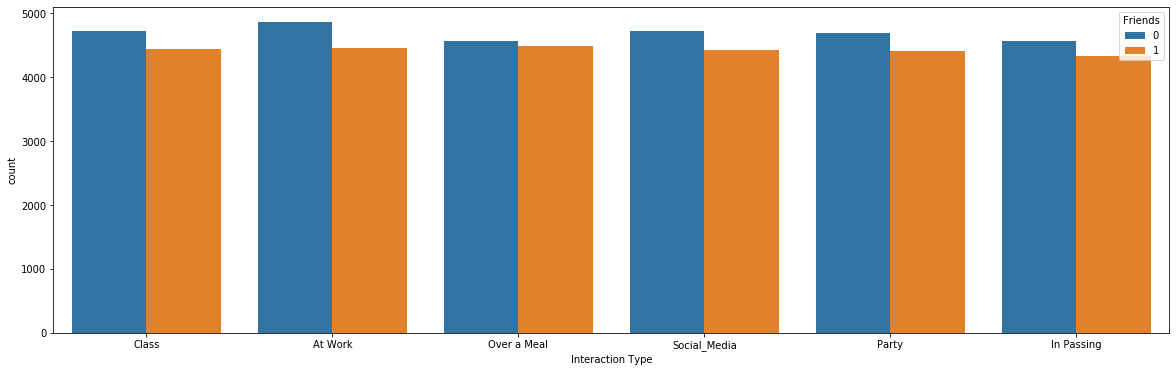

In [19]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.countplot(df['Interaction Type'],hue=df['Friends'])

In [20]:
df['Interaction Duration'].describe()   # here the max Interaction Duration is 30.86
                                        # and min Interaction Duration is 0

count    54697.000000
mean        10.350016
std          7.013008
min          0.000176
25%          4.830330
50%          9.032467
75%         14.525737
max         29.999377
Name: Interaction Duration, dtype: float64

In [21]:
len(df['Moon Phase During Interaction'].unique())  # 8 unique values in Moon Phase During Interaction

8

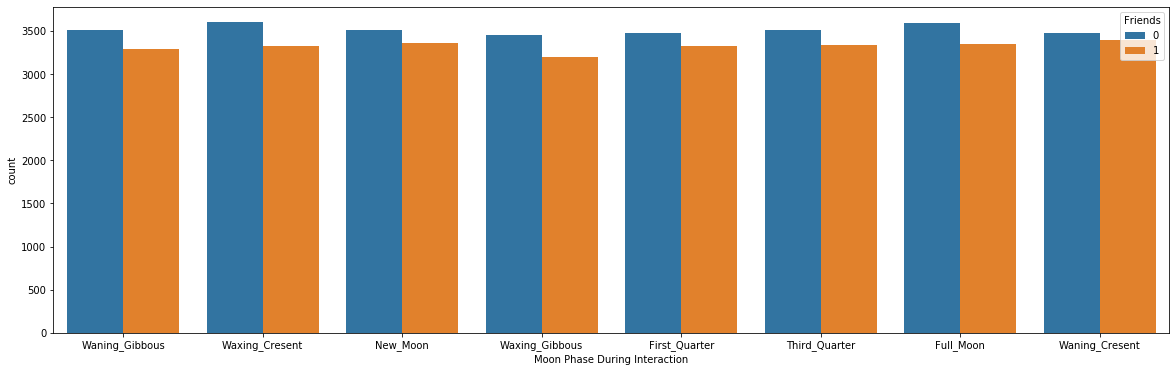

In [22]:
plt.figure(figsize=(20,6))
sns.countplot(df['Moon Phase During Interaction'],hue=df['Friends'])
plt.show()

In [23]:
df['Moon Phase During Interaction'].unique()
# namely          

array(['Waning_Gibbous', 'Waxing_Cresent', 'New_Moon', 'Waxing_Gibbous',
       'First_Quarter', 'Third_Quarter', 'Full_Moon', 'Waning_Cresent'],
      dtype=object)

In [24]:
df['Friends'].unique()   # the target values are only 1 or 0

array([1, 0])

In [25]:
df['Friends'].value_counts()

0    28125
1    26572
Name: Friends, dtype: int64

# ------------------Setting feature vector and target variable --------------------------------

In [26]:
X= df.drop(['Friends','Person A', 'Person B','Interaction Type','Moon Phase During Interaction'],axis=1)

In [27]:
y = df['Friends']

In [28]:
X.head(4)

,Years of Knowing,Interaction Duration
0,3.876560,13.035115
1,2.836218,5.811429
2,3.006119,4.882863
3,2.960067,9.274924


# Split data into separate training and test set

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



# Feature Engineering

Encode categorical variables

In [30]:
# from sklearn import preprocessing

# # categorical = ['Person A', 'Person B', 'Interaction Type', 'Moon Phase During Interaction']
# categorical = []

# for feature in categorical:
#         le = preprocessing.LabelEncoder()
#         X_train[feature] = le.fit_transform(X_train[feature])
#         X_test[feature] = le.transform(X_test[feature])


In [31]:
# X_train.head()

# Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [33]:
X_train.head()

,Years of Knowing,Interaction Duration
0,-0.286471,-0.228679
1,-0.730322,-0.461024
2,-1.328227,-1.293931
3,0.593028,1.680250
4,-0.372367,-0.713636


In [34]:
X_test.head()

,Years of Knowing,Interaction Duration
0,-0.386382,-0.041638
1,-0.688130,-0.674206
2,-0.642794,0.281964
3,1.052380,0.333350
4,-0.321900,-0.221569


# Logistic Regression model with all features

In [35]:
accuracy_dict = { 'LR':0
                }

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(penalty='l2')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all 6 the features: 0.9146


In [37]:
accuracy_dict['LR']=0.9147

In [38]:
logreg.score(X_train, y_train)


0.9165513098440724

# PCA

In [39]:
from sklearn.decomposition import PCA
pca = PCA()
temp_X_train= X_train
temp_X_train = pca.fit_transform(temp_X_train)
pca.explained_variance_ratio_

array([0.87754302, 0.12245698])

In [40]:
# As we can see every feature adds significant variance hence
# droping the variables in this case is not a good idea! Therefore we should use every 
# feature present to build our model as done previously.

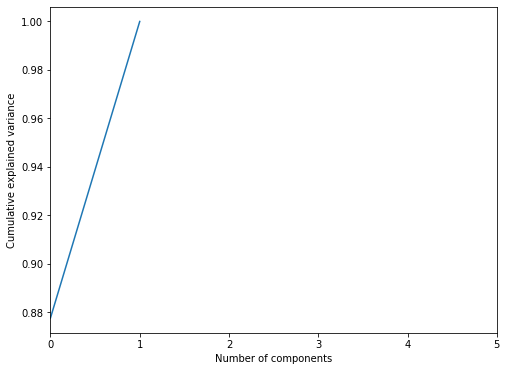

In [41]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,5,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()
# ploting cumulative explained variance ratio with number 
# of components to show how variance ratio varies with number of components.

In [42]:
# X_train = X_train.iloc[: , 0:3]


# X_test = X_test.iloc[: , 0:3]

In [43]:
# X_train['Years of Knowing']= X_train['Years of Knowing']*3
# X_train['Interaction Duration']= X_train['Interaction Duration']*1.7

In [44]:
X_train

,Years of Knowing,Interaction Duration
0,-0.286471,-0.228679
1,-0.730322,-0.461024
2,-1.328227,-1.293931
3,0.593028,1.680250
4,-0.372367,-0.713636
...,...,...
38282,0.621821,-0.021651
38283,-0.141867,0.527815
38284,-0.267764,-0.902369
38285,0.912249,1.383183


# Decision Tree Model.

In [45]:
from sklearn.tree import DecisionTreeClassifier

# max_features =6 (from above cum_sum chart)
# min_samples_leaf=100 controling the branches by setting the limits (Pruning)

In [46]:

clf = DecisionTreeClassifier(max_features=1,min_samples_leaf=1000,random_state=10)
clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('D-Tree accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

D-Tree accuracy score with all 6 the features: 0.9124


In [47]:
clf.score(X_train, y_train)


0.9158461096455716

In [48]:
accuracy_dict['DecisionTree']=accuracy_score(y_test, y_pred)

# Xgboost

In [49]:
from xgboost import XGBClassifier

clf= XGBClassifier(learning_rate=0.05, n_estimators=206, max_depth=5,
                        min_child_weight=5, 
                         seed=27)

clf.fit(X_train, y_train)

# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)
print('XGboost accuracy score with all 5 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGboost accuracy score with all 5 the features: 0.9178


In [50]:
clf.score(X_train, y_train)


0.9241779193982291

In [51]:
accuracy_dict['Xgboost']=accuracy_score(y_test, y_pred)

# catboost

In [52]:
from catboost import CatBoostClassifier

clf= CatBoostClassifier(learning_rate=0.05, n_estimators=600, max_depth=5)

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)
print('catboost accuracy score with all 5 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

0:	learn: 0.5566785	total: 64.5ms	remaining: 38.6s
1:	learn: 0.4750672	total: 78.5ms	remaining: 23.5s
2:	learn: 0.4153852	total: 92.7ms	remaining: 18.4s
3:	learn: 0.3663530	total: 108ms	remaining: 16.1s
4:	learn: 0.3301686	total: 122ms	remaining: 14.6s
5:	learn: 0.2970675	total: 143ms	remaining: 14.2s
6:	learn: 0.2730302	total: 156ms	remaining: 13.2s
7:	learn: 0.2511524	total: 166ms	remaining: 12.3s
8:	learn: 0.2348095	total: 176ms	remaining: 11.5s
9:	learn: 0.2165708	total: 186ms	remaining: 11s
10:	learn: 0.2032608	total: 196ms	remaining: 10.5s
11:	learn: 0.1926317	total: 206ms	remaining: 10.1s
12:	learn: 0.1874369	total: 215ms	remaining: 9.72s
13:	learn: 0.1802580	total: 225ms	remaining: 9.42s
14:	learn: 0.1775588	total: 235ms	remaining: 9.15s
15:	learn: 0.1726662	total: 244ms	remaining: 8.92s
16:	learn: 0.1709755	total: 254ms	remaining: 8.72s
17:	learn: 0.1688334	total: 267ms	remaining: 8.63s
18:	learn: 0.1670093	total: 281ms	remaining: 8.59s
19:	learn: 0.1644444	total: 296ms	remain

166:	learn: 0.1438959	total: 2.11s	remaining: 5.48s
167:	learn: 0.1438895	total: 2.13s	remaining: 5.47s
168:	learn: 0.1438679	total: 2.14s	remaining: 5.46s
169:	learn: 0.1438554	total: 2.16s	remaining: 5.45s
170:	learn: 0.1438404	total: 2.17s	remaining: 5.45s
171:	learn: 0.1438259	total: 2.18s	remaining: 5.43s
172:	learn: 0.1438111	total: 2.2s	remaining: 5.42s
173:	learn: 0.1437812	total: 2.21s	remaining: 5.41s
174:	learn: 0.1437709	total: 2.23s	remaining: 5.41s
175:	learn: 0.1437553	total: 2.24s	remaining: 5.39s
176:	learn: 0.1437487	total: 2.26s	remaining: 5.39s
177:	learn: 0.1437330	total: 2.27s	remaining: 5.38s
178:	learn: 0.1437049	total: 2.28s	remaining: 5.36s
179:	learn: 0.1436936	total: 2.29s	remaining: 5.34s
180:	learn: 0.1436794	total: 2.3s	remaining: 5.32s
181:	learn: 0.1436665	total: 2.31s	remaining: 5.3s
182:	learn: 0.1436489	total: 2.32s	remaining: 5.29s
183:	learn: 0.1436354	total: 2.34s	remaining: 5.28s
184:	learn: 0.1436209	total: 2.35s	remaining: 5.26s
185:	learn: 0.1

336:	learn: 0.1407134	total: 4.23s	remaining: 3.3s
337:	learn: 0.1407017	total: 4.24s	remaining: 3.29s
338:	learn: 0.1406900	total: 4.26s	remaining: 3.28s
339:	learn: 0.1406695	total: 4.27s	remaining: 3.27s
340:	learn: 0.1406535	total: 4.28s	remaining: 3.25s
341:	learn: 0.1406349	total: 4.29s	remaining: 3.24s
342:	learn: 0.1406257	total: 4.3s	remaining: 3.23s
343:	learn: 0.1406066	total: 4.31s	remaining: 3.21s
344:	learn: 0.1405958	total: 4.32s	remaining: 3.19s
345:	learn: 0.1405751	total: 4.33s	remaining: 3.18s
346:	learn: 0.1405581	total: 4.34s	remaining: 3.17s
347:	learn: 0.1405392	total: 4.35s	remaining: 3.15s
348:	learn: 0.1405198	total: 4.36s	remaining: 3.14s
349:	learn: 0.1404967	total: 4.37s	remaining: 3.12s
350:	learn: 0.1404821	total: 4.38s	remaining: 3.11s
351:	learn: 0.1404634	total: 4.41s	remaining: 3.11s
352:	learn: 0.1404495	total: 4.43s	remaining: 3.1s
353:	learn: 0.1404332	total: 4.44s	remaining: 3.08s
354:	learn: 0.1404137	total: 4.46s	remaining: 3.07s
355:	learn: 0.1

496:	learn: 0.1381641	total: 6.25s	remaining: 1.29s
497:	learn: 0.1381514	total: 6.26s	remaining: 1.28s
498:	learn: 0.1381387	total: 6.27s	remaining: 1.27s
499:	learn: 0.1381311	total: 6.29s	remaining: 1.26s
500:	learn: 0.1381122	total: 6.3s	remaining: 1.24s
501:	learn: 0.1380950	total: 6.31s	remaining: 1.23s
502:	learn: 0.1380816	total: 6.32s	remaining: 1.22s
503:	learn: 0.1380679	total: 6.33s	remaining: 1.21s
504:	learn: 0.1380581	total: 6.34s	remaining: 1.19s
505:	learn: 0.1380402	total: 6.35s	remaining: 1.18s
506:	learn: 0.1380270	total: 6.36s	remaining: 1.17s
507:	learn: 0.1380039	total: 6.37s	remaining: 1.15s
508:	learn: 0.1379950	total: 6.38s	remaining: 1.14s
509:	learn: 0.1379823	total: 6.39s	remaining: 1.13s
510:	learn: 0.1379657	total: 6.4s	remaining: 1.11s
511:	learn: 0.1379554	total: 6.41s	remaining: 1.1s
512:	learn: 0.1379429	total: 6.42s	remaining: 1.09s
513:	learn: 0.1379298	total: 6.43s	remaining: 1.07s
514:	learn: 0.1379210	total: 6.44s	remaining: 1.06s
515:	learn: 0.1

In [53]:
clf.score(X_train, y_train)


0.9268681275628804

In [54]:
accuracy_dict['Catboost']=accuracy_score(y_test, y_pred)

In [55]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# RandomForestClassifier

In [56]:
clf= RandomForestClassifier( n_estimators=1000)

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('RandomForestClassifier accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)



RandomForestClassifier accuracy score with all 6 the features: 0.9076


1.0

In [57]:
accuracy_dict['RandomForest']=accuracy_score(y_test, y_pred)

# GradientBoostingClassifier

In [58]:
clf= GradientBoostingClassifier(loss='exponential',
    learning_rate=0.01,
    n_estimators=410,
    max_depth=5,
    max_features=2,
    subsample=0.8,                            
    )

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('GradientBoostingClassifier accuracy score with all 2 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

GradientBoostingClassifier accuracy score with all 2 the features: 0.9174


0.9251704233813044

In [59]:
accuracy_dict['GradientBoost']=accuracy_score(y_test, y_pred)

# AdaBoostClassifier

In [60]:
clf= AdaBoostClassifier(base_estimator=None,
    n_estimators=1500,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None,)

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('AdaBoostClassifier accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

AdaBoostClassifier accuracy score with all 6 the features: 0.9135


0.9260062162091571

In [61]:
accuracy_dict['AdaBoost']=accuracy_score(y_test, y_pred)

# SVC

In [62]:
# SVC
from sklearn.svm import SVC

clf= SVC()

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('SVC accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

SVC accuracy score with all 6 the features: 0.9148


0.9179878287669444

In [63]:
accuracy_dict['SVC']=accuracy_score(y_test, y_pred)

# BaggingClassifier

In [64]:
# base_cls = DecisionTreeClassifier() 
base_cls= RandomForestClassifier() #0.8459

In [65]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier
clf= BaggingClassifier(#base_estimator=base_cls,
    n_estimators=600,
   )
""" max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0,"""

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('BaggingClassifier accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

BaggingClassifier accuracy score with all 6 the features: 0.9080


1.0

In [66]:
accuracy_dict['BaggingClassifier']=accuracy_score(y_test, y_pred)

# KNeighborsClassifier

In [67]:
# KNeighborsClassifier/
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier()
# criterion
clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('KNeighborsClassifier accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

KNeighborsClassifier accuracy score with all 6 the features: 0.9074


0.9383602789458563

In [68]:
accuracy_dict['KNeighbor']=accuracy_score(y_test, y_pred)

# RidgeClassifier

In [69]:
# RidgeClassifier
from sklearn.linear_model import RidgeClassifier
clf= RidgeClassifier()

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('RidgeClassifier accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

RidgeClassifier accuracy score with all 6 the features: 0.8976


0.8972236006999765

In [70]:
accuracy_dict['RidgeClassifier']=accuracy_score(y_test, y_pred)

# GaussianNB

In [71]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
clf= GaussianNB()

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('GaussianNB accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

GaussianNB accuracy score with all 6 the features: 0.9076


0.9119022122391413

In [72]:
accuracy_dict['GuasianNB']=accuracy_score(y_test, y_pred)

# HistGradientBoostingClassifier

In [73]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

clf= HistGradientBoostingClassifier( loss='binary_crossentropy',
    learning_rate=0.001,
    max_iter=6000,
    max_depth=5,
    max_leaf_nodes=5,
   )

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('GaussianNB accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

GaussianNB accuracy score with all 6 the features: 0.9168


0.9207302739833364

In [74]:
accuracy_dict['HistGradientBoost']=accuracy_score(y_test, y_pred)

# LGBMClassifier

In [75]:
from lightgbm import LGBMClassifier

clf= LGBMClassifier(boosting_type='gbdt',
    num_leaves=20,
    max_depth=10,
    learning_rate=0.001,
    n_estimators=600,
    subsample=0.9,)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('LGBMClassifier accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

LGBMClassifier accuracy score with all 6 the features: 0.9174


0.9208869851385588

In [76]:
accuracy_dict['LGBMClassifier']=accuracy_score(y_test, y_pred)

# Summary

In [77]:
# print(accuracy_dict.items())
for k, v in accuracy_dict.items():
    print (k, '-->', v)
#     print("\n")

LR --> 0.9147
DecisionTree --> 0.9124314442413163
Xgboost --> 0.917794028031688
Catboost --> 0.916819012797075
RandomForest --> 0.907556368068251
GradientBoost --> 0.9173674588665448
AdaBoost --> 0.913528336380256
SVC --> 0.9148080438756856
BaggingClassifier --> 0.9080438756855576
KNeighbor --> 0.9074344911639244
RidgeClassifier --> 0.8976234003656307
GuasianNB --> 0.907556368068251
HistGradientBoost --> 0.9167580743449116
LGBMClassifier --> 0.9173674588665448


# VotingClassifier

In [81]:
from sklearn.ensemble import VotingClassifier

In [82]:

x_clf= XGBClassifier(learning_rate=0.05, n_estimators=206, max_depth=5,
                        min_child_weight=5, 
                         seed=27)


l_clf= LGBMClassifier(boosting_type='gbdt',
    num_leaves=20,
    max_depth=10,
    learning_rate=0.001,
    n_estimators=600,
    subsample=0.9,)

g_clf= GradientBoostingClassifier(loss='exponential',
    learning_rate=0.01,
    n_estimators=410,
    max_depth=5,
    max_features=2,
    subsample=0.8,                            
    )

In [88]:
# ('XGBClassifier', x_clf),
voting_clf = VotingClassifier( estimators=[ ('XGBClassifier', x_clf),('LGBMClassifier', l_clf),('GradientBoostingClassifier',g_clf)], voting='soft' )#,weights=[1,3,3,3]
# voting_clf = VotingClassifier( estimators=[x_clf,r_clf, b_clf], voting='hard' )


voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.05,
                                            max_delta_step=None, max_depth=5,
                                            min_child_weight=5, missing=nan,
                                            monotone_constraints=None,
                                            n_estimator...
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0

In [89]:
y_pred = voting_clf.predict(X_test)

print('Voting accuracy score with all 2 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
voting_clf.score(X_train, y_train)

Voting accuracy score with all 2 the features: 0.9174


0.9245958158121556

# Stacking of models

In [91]:
# Create Base Learners
base_learners = [
                 ('rf_1', XGBClassifier(learning_rate=0.05, n_estimators=206, max_depth=5,
                        min_child_weight=5, 
                         seed=27)),
                 ('rf_2', LGBMClassifier(boosting_type='gbdt',num_leaves=20,
    max_depth=10,    learning_rate=0.001,    n_estimators=600,    subsample=0.9))            
                ]



In [95]:
from sklearn.ensemble import StackingClassifier

In [96]:
# Initialize Stacking Classifier with the Meta Learner
clf = StackingClassifier(estimators=base_learners, final_estimator=GradientBoostingClassifier(loss='exponential',
    learning_rate=0.01,
    n_estimators=410,
    max_depth=5,
    max_features=2,
    subsample=0.8,                            
    )
)


In [97]:
clf.fit(X_train, y_train).score(X_test, y_test)

0.9170627666057282

# 4. Multi-layer Stacking

In [99]:
# Create Learners per layer
layer_one_estimators = [
                        ('gb_1', GradientBoostingClassifier(loss='exponential',
                                learning_rate=0.01,
                                n_estimators=410,
                                max_depth=5,
                                max_features=2,
                                subsample=0.8,                            
                                )),
                        
                         ('xg_1', XGBClassifier(learning_rate=0.05, n_estimators=206, max_depth=5,
                        min_child_weight=5, 
                         seed=27))           
                       ]


In [100]:
layer_two_estimators = [
                         ('lg_2', LGBMClassifier(boosting_type='gbdt',num_leaves=20,
    max_depth=10,    learning_rate=0.001,    n_estimators=600,    subsample=0.9)) ,
                        ('gb_2', GradientBoostingClassifier(loss='exponential',
                                learning_rate=0.01,
                                n_estimators=410,
                                max_depth=5,
                                max_features=2,
                                subsample=0.8,                            
                                ))
                       ]


In [101]:
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())



In [102]:
# Create Final model by 
clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)


In [103]:
clf.fit(X_train, y_train).score(X_test, y_test)

0.9171846435100548

# NN

In [85]:
# from keras.models import Sequential
# from keras.layers import Dense

# model = Sequential([    Dense(32, activation='relu', input_shape=(4,)),
#                         Dense(32, activation='relu'),
#                         Dense(1, activation='sigmoid'),])


# model.compile(optimizer='sgd',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])


# hist = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))


# # model.compile(optimizer='sgd',              loss='binary_crossentropy',              metrics=['accuracy'])


# model.evaluate(X_test, y_test)[1]

# import matplotlib.pyplot as plt

# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper right')
# plt.show()


# plt.plot(hist.history['accuracy'])
# plt.plot(hist.history['val_accuracy'])
# plt.title('Model accuracy')
# # plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='lower right')
# plt.show()


# Testing

In [104]:
test_df = pd.read_csv("test.csv")

# X= df.drop(['Friends','Moon Phase During Interaction','Interaction Type'],axis=1)

test_df.drop(["ID",'Person A', 'Person B','Interaction Type',"Moon Phase During Interaction"],axis=1,inplace=True)

# categorical = []
# for feature in categorical:
#         le = preprocessing.LabelEncoder()
#         test_df[feature] = le.fit_transform(test_df[feature])
        


scaler = StandardScaler()

test_df = pd.DataFrame(scaler.fit_transform(test_df), columns = test_df.columns)

result = clf.predict(test_df)
temp_df=pd.read_csv("test.csv")

result_data=temp_df['ID']

result_data_df = result_data.to_frame()

result_data_df['Friends']=result

result_data_df.to_csv('submit.csv',index=False) 